## Object Detection

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import mxnet as mx
import json
import os
from os import listdir, getcwd

In [2]:
# constants

train_path = 'darknet/data/training'
test_path = 'darknet/data/testing'
width = 640
height = 360

### Definition

In [3]:
# function used in converting label.idl into .txt

def convert_annotation(path, img_id, box):
    classes = {1:0, 2:1, 3:2, 20:3}
    out_f = open(os.path.join(path, '%s.txt'%(img_id)), 'w')
    for box in d:
        x1, y1, x2, y2, cls = box
        dw = 1./width
        dh = 1./height
        # why dw here?
        cx = (x2+x1)/2.*dw
        cy = (y2+y1)/2.*dh
        w = (x2-x1)*dw
        h = (y2-y1)*dh
        out_f.write(str(classes[cls]) + " " + " ".join([str(s) for s in [cx, cy, w, h]]) + '\n')
    out_f.close
    
def draw(img_file, boxes):
    classes = {0:"vehicle", 1:"pedestrian", 2:"cyclist", 3:"traffic lights"}
    img = plt.imread("{}".format(img_file))
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for box in boxes:
        x1, y1, x2, y2, cls = box
        rec = patches.Rectangle((x1,y1),x2-x1,y2-y1, 
                                linewidth=1, edgecolor='b', facecolor='none', label=classes[cls])
        ax.add_patch(rec)
        plt.gca().text(x1, y1, '{:s} {:.3f}'.format(classes[cls], 1.0), 
                       bbox=dict(facecolor='red', alpha=0.5), fontsize=8, color='white')
    plt.show()

### Convert

In [4]:
with open(os.path.expanduser(os.path.join(train_path, 'label.idl'))) as s:
    if not os.path.exists(os.path.join(train_path, 'label.idl')):
        print "check the path of label.idl"
    rows = s.read().splitlines()
    annotations = {}
    for row in rows:
        annotation = json.loads(row)
        annotations.update(annotation)
    imglist = annotations.keys()
    # print annotations
    
    i = 0
    tf = open(os.path.join(train_path, "train.txt"), "w")
    for k, d in annotations.items():
        img_id = k.split('.')[0]
        tf.write(os.path.join(getcwd(), train_path, '%s.jpg'%(img_id)) + '\n')
        convert_annotation(train_path, img_id, d)
        i += 1
    tf.close()
    print "Generated train.txt for images of total num %d" %(i)
    
    i = 0
    vf = open(os.path.join(test_path, "val.txt"), "w")
    dirs = os.listdir(test_path)
    for files in dirs:
        if files.endswith('jpg'):
            vf.write(os.path.join(getcwd(), test_path, files) + '\n')
            i += 1
    vf.close()
    print "Generated val.txt for images of total num %d" %(i)

Generated train.txt for images of total num 10000
Generated val.txt for images of total num 2000


### Visualize

/home/ubuntu/capstone4/darknet/data/training/67777.jpg


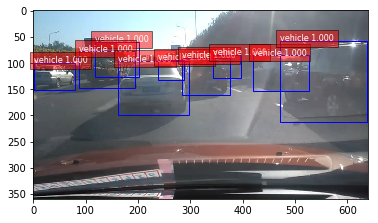

[[0.16666688000000374, 99.83339999999998, 79.66656, 152.1666, 0], [116.99967999999998, 58.833359999999985, 200.99967999999998, 127.1664, 0], [86.49983999999999, 77.50008, 194.1664, 147.49992, 0], [161.33312000000004, 96.33347999999998, 298.16639999999995, 198.66672, 0], [237.16671999999997, 93.99995999999999, 287.8336, 133.33319999999998, 0], [284.33343999999994, 90.16668, 376.49983999999995, 160.99992, 0], [342.66687999999994, 84.66659999999999, 397.00032, 129.33324, 0], [418.83327999999995, 85.50000000000001, 527.1667199999999, 153.66672, 0], [471.00032, 56.99988, 638.3334399999999, 212.66675999999998, 0]]


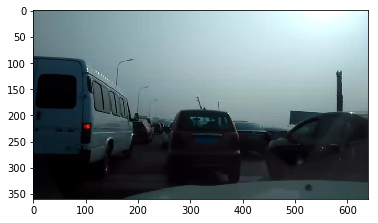

In [5]:
with open(os.path.join(train_path, "train.txt"), 'r') as f:
    # get a viusalization 
    rows = f.read().splitlines()
    imgfile = rows[3]
    print imgfile
    annotation_file = train_path + "/" + imgfile.split('/')[-1].split(".")[0] + ".txt"
    annotation = open(annotation_file, 'r')
    annotation_rows = annotation.read().splitlines()
    box = []
    for row in annotation_rows:
        cls, cx, cy, w, h = [float(a) for a in row.split()]
        cls = int(cls)
        dw = 1./width
        dh = 1./height
        xmin = (cx-w/2.)/dw
        xmax = (cx+w/2.)/dw
        ymin = (cy-h/2.)/dh
        ymax = (cy+h/2.)/dh
        box.append([xmin, ymin, xmax, ymax, cls])
    draw(imgfile, box)
    print box
with open(os.path.join(test_path, "val.txt"), 'r') as f:
    # get a viusalization 
    lines = f.read().splitlines()
    imgfile = lines[3]
    box = []
    draw(imgfile, box)

### Train

In [6]:
# !nohup ./darknet detector train data/ucar.data cfg/ucar.cfg darknet19_448.conv.23 > nohup1.out 2>&1&